Project guide: https://www.dataquest.io/m/214/guided-project%3A-investigating-airplane-accidents



# 1. Introduction

Searching for a value in a 1-dimensional array can be done in linear time by checking every element in the array. If, however, the array has been sorted, the search can be done in logarithmic time (which is much faster than linear time) using binary search.

Searching inside a matrix (2-dimensional array), which is essentially an array of arrays, is a similar problem, but takes a bit more work.

In this project, I will do the following.

1. Discuss the time complexities of matrix* searches in which a row containing a specified value will be retrieved.
2. Measure the search durations using three different data types (Python's [list](https://docs.python.org/3/tutorial/introduction.html#lists), numpy array ([ndarray](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.html)) and pandas [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)).

\**I will refer to a 2-dimensional array as a matrix regardless of the data type.*

Retrieving a row instead of just checking if a value is in the matrix may complicate the issue. However, this is not in the scope of this project and I will ignore it.










# 2. Analysis of matrix search methods

## 2.1. Time complexity analysis

### 2.1.1. What is time complexity?
Time complexity refers to how fast an algorithm can run, measured as the number of steps to be taken by the algorithm. Often the worst-case scenario is considered (e.g. searching for the last element in an array), which can produce a guaranteed running time.

Time complexity is one of several measures of [algorithmic efficiency](https://en.wikipedia.org/wiki/Algorithmic_efficiency). Another common measure is the space compexity (amount of required memory to run the algorithm). However, these other measures will not be discussed here because they are outside the scope of this project.


### 2.1.2. Time complexities of matrix search algorithms

The following table shows the time complexities of linear and binary searches. 

* `n`: Number of rows
* `m`: Number of columns

||Time complexity|
|---|---|
|Linear search in the whole matrix (unsorted columns)|**O(m * n)**<br />(=Linear time)|
|Binary search per column (sorted columns)|**O(m log n)**<br />(> Logarithmic time)|

As with the 1-dimensional arrays, an unsorted matrix can be searched only in linear time.



A matrix search can be done in logarithmic time as well if the matrix is converted into a sorted 1-dimensional array first. For this new array, the original locations of each element in the matrix should be noted.

However, this project will be about searching the matrix as it is. If each column** has been sorted*, the search can still be faster than linear time. However, as shown in the table, it will be slower than logarithmic time because a binary search has to be done per column** (i.e. repeatedly rather than at one go).

\**Sorting a matrix by all columns is not possible. So, I will first separate each column, note its elements' original row IDs, and then sort the column. When the binary search finds an element, the original row ID will be used to retrieve the corresponding row.*

\*\**Sorting and binary searching can be done in terms of rows. However, the table above reflects sorting and searching within columns, which is also what I will do in this project.*


### 2.1.3. Time complexities of data structures

I will use three different data structures, among various ones provided by Python and its libraries.

Each data structure diplays different time complexities for the same operation. For example, `3 in {1, 2, 3}` (set) is usually faster than `3 in [1, 2, 3]` (list) - see https://wiki.python.org/moin/TimeComplexity for more.

Therefore, in a more thorough study, the time complexity analysis would consider the **time complexities of both the algorithm and each data structure**.

However, I do not have sufficient knowledge to calculate time complexities per data structure. For a less robust alternative, see the next section.


## 2.2. Measuring search durations using different data structures

I will measure the running time using each data structure in the next section.

* List of lists
* pandas data frame (which is faster than a [dictionary](https://stackoverflow.com/a/22084742/7194743))
* Numpy array (which is faster than a [list](https://webcourses.ucf.edu/courses/1249560/pages/python-lists-vs-numpy-arrays-what-is-the-difference) or [pandas data frame](https://stackoverflow.com/a/27889133/7194743))


### 2.2.1. Create matrix

I will create matrices with 3 different dimensions: 10 x 10, 100 x 100, 1000 x 1000. Matrices with each dimension will be have all three types of data structures. Therefore, there will be a total of 9 matrices.

In [1]:
from collections import OrderedDict
from pprint import pprint
from IPython.display import display

import numpy as np
import pandas as pd

# Allow 10 decimal places to be displayed for floats
pd.set_option('display.precision',10)

def generate_matrix(num_rows, num_cols):
    """
    Return two output.
    
    (1) a matrix of integers starting from 0,
        with dimension num_rows x num_cols
        per data type.
        
        The data types are:
            list of lists,
            numpy array of array,
            pandas dataframe
            
    (2) maximum value in the matrix (last element)    
    """

    # Define dimensions
    dim = num_rows * num_cols

    # Create matrix as a list of list
    matrix_list = []
    row = []
    for i in range(dim):
        row.append(i)
        if i % num_rows == num_rows - 1:
            matrix_list.append(row)
            row = []
            
    # Create matrix as a numpy array of arrays
    # and pandas dataframe
    matrix_array = np.array(matrix_list)
    matrix_df = pd.DataFrame(matrix_list)
    
    return matrix_list, matrix_array, matrix_df


def get_matrix_max(matrix_array):
    
    # Get maximum value in the matrix_df and its column index
    return matrix_array.max()

def get_class_name(data_structure):
    return type(data_structure).__name__
    

def create_search_durations_tracker(matrices_dict):

    # Create dataframe
    for dims_label in matrices_dict:
        columns = [get_class_name(i) for i in matrices_dict[dims_label]]
        durations = pd.DataFrame(columns=columns)
        break
    
    # Add rows
    for dims_label in matrices_dict:
        durations_row = pd.DataFrame(index=[dims_label], columns=columns)
        durations = durations.append(durations_row)
    
    # Fill with 0
    durations = durations.fillna(0)
    
    return durations
        
# Dimensions for each matrix
dims = (10, 10)

num_dims_sets = 3




# Dictionary to keep matrices
matrices_dict = {}

# Dictionary to keep search results
target_rows_dict = {}

# For each set of dimensions
for i in range(num_dims_sets):
    
    # Create matrix with the dimensions
    matrix_list, matrix_array, matrix_df = generate_matrix(dims[0], dims[1])
    
    # Store matrices in dictionary
    dims_label = "{} x {}".format(dims[0], dims[1])
    matrices_dict[dims_label] = [matrix_list, matrix_array, matrix_df]
    
    # Prepare dictionary to store search results
    target_rows_dict[dims_label] = {get_class_name(i): None for i in matrices_dict[dims_label]}
    
    # Increment dimensions
    dims = tuple(i * 10 for i in dims)
    
    # Show matrix dimensions
    print("Matrix {}".format(i + 1))
    print("Dimensions: {} x {}".format(matrix_array.shape[0], matrix_array.shape[1]))
    print("Max value:", get_matrix_max(matrix_array))
    print()

# Sort dictionary by key (dimensions)
matrices_dict = OrderedDict(sorted(matrices_dict.items()))
target_rows_dict

Matrix 1
Dimensions: 10 x 10
Max value: 99

Matrix 2
Dimensions: 100 x 100
Max value: 9999

Matrix 3
Dimensions: 1000 x 1000
Max value: 999999



{'10 x 10': {'list': None, 'ndarray': None, 'DataFrame': None},
 '100 x 100': {'list': None, 'ndarray': None, 'DataFrame': None},
 '1000 x 1000': {'list': None, 'ndarray': None, 'DataFrame': None}}

### 2.2.1. Search

Each search will be repeated 

### 2.2.1.1. Linear search

The maximum value in the matrix will be searched for to simulate the worst-case scenario.

Numberof iteration: 100




Retrieved row:


,0,1,2,3,4,5,6,7,8,9
9,90,91,92,93,94,95,96,97,98,99


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
99,9900,9901,9902,9903,9904,9905,9906,9907,9908,9909,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
999,999000,999001,999002,999003,999004,999005,999006,999007,999008,999009,...,999990,999991,999992,999993,999994,999995,999996,999997,999998,999999






Search durations (plot):


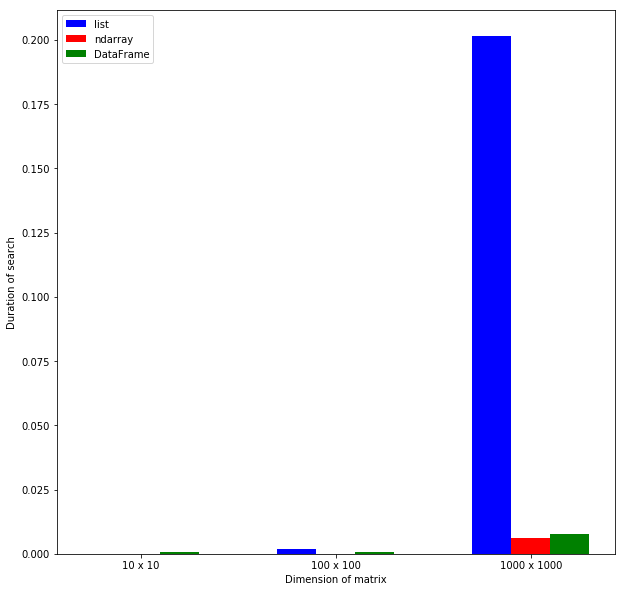





Search durations (table):


,list,ndarray,DataFrame
10 x 10,0.0000286245,0.0000274658,0.0006683135
100 x 100,0.0020446205,0.0000742078,0.0006975174
1000 x 1000,0.2015099263,0.0063028431,0.0077671957


In [2]:
from time import time

import copy
import matplotlib.pyplot as plt


%matplotlib inline

def get_number_of_cols(matrix):
    # 1. list
    if type(matrix) == list:
        num_cols = len(matrix[0])

    # 2. numpy array or pandas dataframe
    elif type(matrix) in [np.ndarray, pd.core.frame.DataFrame]:
        num_cols = matrix.shape[1]

    return num_cols


def matrix_to_sorted_columns_and_inds(matrix):
    
    # Number of columns in matrix
    num_cols = get_number_of_cols(matrix)
    
    # Sorted columns
    col_vals_list = []
    
    # Original row indexes of matrix.
    # These indexes will lead each value in
    # sorted column back to the original row in matrix.
    row_inds_list = []
    
    # For each column
    for column_index in range(num_cols):
        
        # Sort column with original row indexes noted
        col_vals, row_inds = prepare_columns(matrix, column_index)
        
        # Collect output
        row_inds_list.append(row_inds)
        col_vals_list.append(col_vals)
    
    return col_vals_list, row_inds_list

def plot_search_durations(df):
    """
    df: pandas dataframe containing search durations where
        row indexes are dimensions of matrices and
        column indexes represent data types
    
    Draw bar plot with df.
    """
    
    # Parameters for plot
    width = 0.2
    colors = ["b", "r", "g"]

    # Number of bars (= number of rows in df)
    num_bars = df.shape[1]

    # Initialise figure and axes
    fig, ax = plt.subplots(figsize=(10, 10))

    # x (= number of matrices = number of columns in df)
    num_xticks = df.shape[0]
    x_init = np.arange(num_xticks)
    x = x_init

    # For each column (matrix) in df
    for i in range(num_bars):

        # Add bars (data types)
        ax.bar(x, df.iloc[:,i], width, color=colors[i])
        
        # Set position for next set of bars
        x = x + width

    plt.xlabel("Dimension of matrix")
    plt.ylabel("Duration of search")

    plt.xticks((x_init + (x - width)) / 2, df.index)
    plt.xticks(rotation="horizontal")

    plt.legend(df.columns, loc="upper left")
    
    plt.show()

def linear_search_matrix(matrix, target):
    
    # Start measuring time
    start = time()
    
    target_row = []
    
    # Get row containing the target when matrix is a ...
    # 1. list
    if type(matrix) == list:
        for row in matrix:
            for val in row:
                if target == val:
                    target_row = row
                    break
            if len(target_row) > 0:
                break
    
    # 2. numpy array
    elif type(matrix) == np.ndarray:
        target_row = matrix[np.where(matrix == target)[0]]
    
    # 3. pandas dataframe
    elif type(matrix) == pd.core.frame.DataFrame:
        try:
            target_row = matrix.iloc[np.where(matrix == target)[0][0]]
        except:
            pass
    
    # Finish measuring time
    end = time()
    duration = end - start
    
    return target_row, duration


def search_and_return_output(matrices_dict, target_rows_dict, algorithm, num_iterations):

    # Initialize search durations tracker
    durations_sum = create_search_durations_tracker(matrices_dict)

    # Dict for collecting sorted columns for each data type
    sorted_cols = copy.deepcopy(target_rows_dict)

    # Do this num_iterations times
    for i in range(num_iterations):
        
        # For each set of dimensions
        for dims in matrices_dict:

            # Get max value in matrix
            matrix_max = get_matrix_max(matrices_dict[dims][1])

            # For each matrix
            for matrix in matrices_dict[dims]:
                
                # Note matrix data type
                matrix_type = get_class_name(matrix)
                
                # Carry out linear search and measure duration
                if algorithm == "linear":
                    target_row, duration = linear_search_matrix(matrix, matrix_max)
                
                # Or xarry out binary search and measure duration
                elif algorithm == "binary":
                    
                    # Extract sorted columns and original row indexes for each value in column
                    if sorted_cols[dims][matrix_type] is None:
                        col_vals_list, row_inds_list = matrix_to_sorted_columns_and_inds(matrix)
                        sorted_cols[dims][matrix_type] = [col_vals_list, row_inds_list]
                    
                    col_vals_list = sorted_cols[dims][matrix_type][0]
                    row_inds_list = sorted_cols[dims][matrix_type][1]

                    target_row, duration = binary_search_matrix(matrix, matrix_max, col_vals_list, row_inds_list)

                # Record retrieved row in the first iteration only
                if i == 0:
                    target_rows_dict[dims][matrix_type] = target_row

                # Record search duration
                durations_sum.loc[dims, matrix_type] += duration
        
    # Get mean duration
    durations_mean = durations_sum / num_iterations

    return target_rows_dict, durations_mean, num_iterations


def display_outout(target_rows_dict, durations_mean, num_iterations):
    
    print("Numberof iteration:", num_iterations)
    print("\n\n\n")
    
    # Display retrieved row
    print("Retrieved row:")
    for dims in target_rows_dict:
        display(pd.DataFrame(target_rows_dict[dims]["DataFrame"]).T)
    print("\n\n\n")

    # Draw plot of durations_mean
    print("Search durations (plot):")
    plot_search_durations(durations_mean)
    print("\n\n\n")

    # Display durations_mean as a table
    print("Search durations (table):")
    display(durations_mean.astype(float))



    
    
# Number of times to run searches
num_iterations = 100

linear_target_rows = copy.deepcopy(target_rows_dict)

linear_target_rows, linear_duration_mean, num_iterations = search_and_return_output(matrices_dict, \
                                                                                   linear_target_rows, \
                                                                                   "linear", \
                                                                                   num_iterations)

display_outout(linear_target_rows, linear_duration_mean, num_iterations)

The search duration increased together with dimensions. Such phenomenon is most prominent in the list data type.

### 2.2.1.2. Binary search

Numberof iteration: 100




Retrieved row:


,0,1,2,3,4,5,6,7,8,9
9,90,91,92,93,94,95,96,97,98,99


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
99,9900,9901,9902,9903,9904,9905,9906,9907,9908,9909,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
999,999000,999001,999002,999003,999004,999005,999006,999007,999008,999009,...,999990,999991,999992,999993,999994,999995,999996,999997,999998,999999






Search durations (plot):


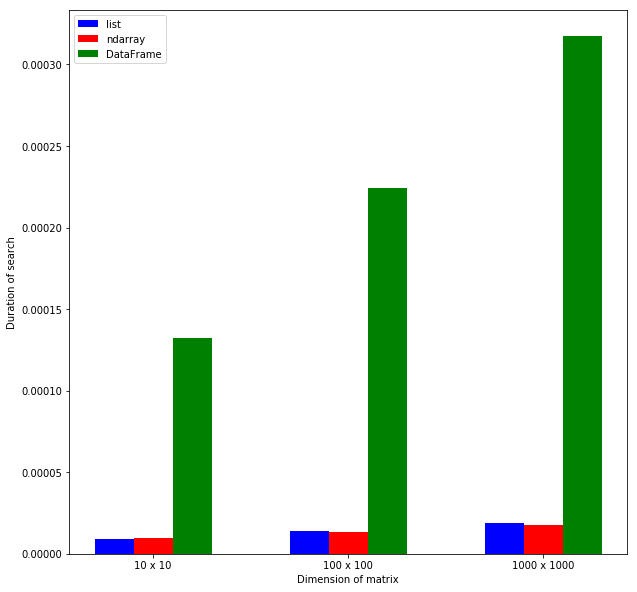





Search durations (table):


,list,ndarray,DataFrame
10 x 10,0.0000091505,0.0000094676,0.0001323009
100 x 100,0.0000138116,0.0000132728,0.0002241421
1000 x 1000,0.0000189447,0.0000178957,0.0003173876


In [3]:
import math

def get_value_from_column(ind, col_vals):
    """
    ind: Index
    col_vals: One sorted column from matrix in the format of list, numpy array or pandas series
    
    Return value at ind in col_vals.    
    """
    
    # 1. list or numpy array
    if type(col_vals) in [list, np.ndarray]:
        val = col_vals[ind]

    # 2. pandas dataframe
    elif type(col_vals) == pd.core.frame.Series:
        val = col_vals.iloc[ind]

    return val
    
def get_average(lo, hi):
    return math.floor((lo + hi) / 2)


        
def binary_search_columns(matrix, target, col_vals, row_inds=None):
    """
    target: Value to find
    matrix: Data in the format of list of lists, numpy array of arrays or pandas dataframe
    col_vals: One sorted column from matrix in the format of list, numpy array or pandas series
    row_inds: Original (i.e. before being sorted) indexes of column.
            This will remain None if col_vals is a pandas series (which already contains
            both values and indexes).
    
    Find target in col_vals using binary search.
    If target is found, return matrix's row at the target's original index.
    """
    
    # Set bounds
    lo = 0
    hi = len(col_vals) - 1
    
    # Get index and value of middle element
    ind = get_average(lo, hi)
    val = get_value_from_column(ind, col_vals)
    
    # Binary search until target is found or column is exhausted
    target_row = []
    while hi > lo:
        
        # Adjust search range
        if target < val:
            hi = ind - 1
        else:
            lo = ind + 1
        
        # Get index and value of middle element
        ind = get_average(lo, hi)
        val = get_value_from_column(ind, col_vals)

        if target == val:
            # Get row of matrix that corresponds to the index when the matrix is a ...
            # 1. list or numpy array
            if row_inds is not None:
                matrix_ind = row_inds[ind]
                target_row = matrix[matrix_ind]
            # 2. pandas dataframe
            else:
                matrix_ind = col_vals.index[ind]
                target_row = matrix.loc[matrix_ind]
    
    return target_row

def get_colVals_rowInds_and_sort(col):

    # 1. When col is a list or numpy array
    if type(col) in [list, np.ndarray]:

        # Get row indexes and values of column
        row_inds_vals = [[ind, val] for [ind, val] in enumerate(col)]

        # Sort column
        row_inds_vals.sort(key = lambda x: x[1])

        # Separate indexes and values
        # 1.1. list
        if type(col) == list:
            row_inds, col_vals = map(list, zip(*row_inds_vals))

        # 1.2. numpy array
        elif type(col) == np.ndarray:
            row_inds, col_vals = map(np.array, zip(*row_inds_vals))

            # Ensure indexes are integers
            row_inds = row_inds.astype(int)
    
    # 2. When col is a pandas dataframe
    elif type(col) == pd.core.frame.Series:
        
        # Sort column
        col = col.sort_values()

        # Get indexes and values of column
        row_inds = None # indexes are already included in col
        col_vals = col    

    return col_vals, row_inds

def get_column(matrix, column_index):

    # Extract column when matrix is a ...
    # 1. list
    if type(matrix) == list:
        col = [i[column_index] for i in matrix]
        
    # 2. numpy array
    elif type(matrix) == np.ndarray:
        col = matrix[:,column_index]
        
    # 3. pandas dataframe
    elif type(matrix) == pd.core.frame.DataFrame:
        col = matrix.iloc[:,column_index]

    return col


def prepare_columns(matrix, column_index):
    
    col = get_column(matrix, column_index)
        
    # Get indexes and values of column, then sort by values
    col_vals, row_inds = get_colVals_rowInds_and_sort(col)
    
    return col_vals, row_inds

def get_number_of_cols(matrix):
    # 1. list
    if type(matrix) == list:
        num_cols = len(matrix[0])

    # 2. numpy array or pandas dataframe
    elif type(matrix) in [np.ndarray, pd.core.frame.DataFrame]:
        num_cols = matrix.shape[1]

    return num_cols


def binary_search_matrix(matrix, target, col_vals_list, row_inds_list):
    
    # Initialise time measurement
    duration = 0
    
    # Get number of columns in matrix
    num_cols = len(col_vals_list)

    # For each column
    for column_index in range(num_cols):
        
        # Get column values and row indexes
        col_vals = col_vals_list[column_index]
        row_inds = row_inds_list[column_index]

        # Start measuring time
        start = time()

        # Carry out search
        target_row = binary_search_columns(matrix, target, col_vals, row_inds)

        if len(target_row) > 0:
            break

        # Finish measuring time
        end = time()
        duration = end - start
        
    return target_row, duration

    
    
binary_target_rows = copy.deepcopy(target_rows_dict)

binary_target_rows, binary_duration_mean, num_iterations = search_and_return_output(matrices_dict, \
                                                                                   binary_target_rows, \
                                                                                   "binary", \
                                                                                   num_iterations)

display_outout(binary_target_rows, binary_duration_mean, num_iterations)

## 2.2.3. Speeds of row retrieval in different data structures

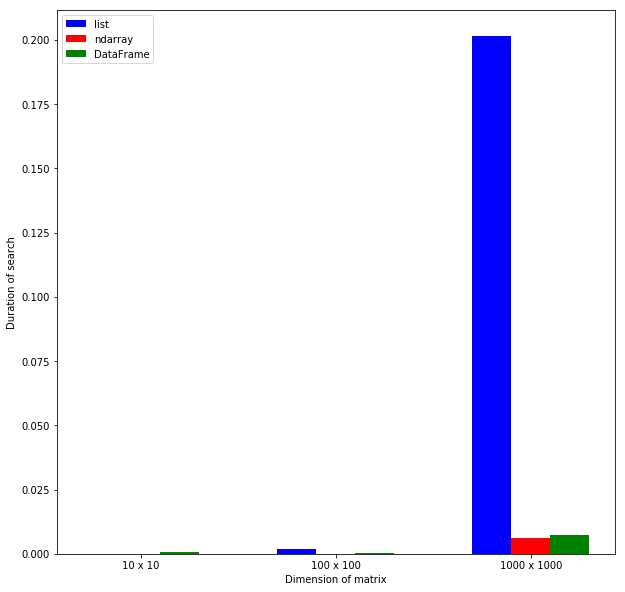

In [4]:
plot_search_durations(linear_duration_mean - binary_duration_mean)

### 1. Column is not known

### 1.1. Columns are not sorted
### 

This is the case for linear search in ...
* List of lists (each inner list contains the elements from each row).
* List of dictionaries (in each dictionary, keys are column names and values are the elements from each row).

### 1.2. Columns are sorted
### 


### 2. Column is known

### 2.1. Columns are not sorted
###  

### 2.2. Columns are sorted
### 

This can be achieved using [binary search](https://en.wikipedia.org/wiki/Binary_search_algorithm) if two conditions are met:

1. Search is carried out in only one column (i.e. we need to specify the column index).
2. The column has been sorted.
    * Note on time complexity
        * This second condition is important because, using Python's [list.sort()](https://stackoverflow.com/a/17555237/7194743) or [sorted(list)](https://stackoverflow.com/a/4174955/7194743), sorting by the column has the time complexity `O(n log n)` ([link 1](https://stackoverflow.com/a/14434514/7194743), [link 2](https://en.wikipedia.org/wiki/Timsort), [link 3](https://wiki.python.org/moin/TimeComplexity)).
        * If this condition is not met, the time complexity of sorting and binary search will be `O(n log n) (=O(n log n) + O(log n) = O(1254893.1226116896))`.
    * Implementation
        * Each column will be loaded as a list of tuples and sorted. Each tuple will contain the value and its original index in the **column**.

However, meeting the second condition would mean keeping the sorted matrix available for each column. So, for example, if there are 3 columns, 3 matrices should be kept in memory, each sorted by different columns.

It will require a lot of memory, so I will dismiss this approach.


# Step 2

# Limitations

* Space complexity
* Addtional steps in algorithms created for this project.
* Row retrieval instead of value retrieval could complicate the issue.
* Note that **time measurement is not as robust as time complexity analysis**. For example, other processes running in the background of a computer can vary across time. This can differentially affect the performance of different algorithms.
* Binary search is taking more time.